In [1]:
import pandas as pd
from sqlalchemy import create_engine

###  *Set up sqllite database*

In [2]:
df = pd.read_csv('data.csv', encoding= 'unicode_escape')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [41]:
disk_engine = create_engine('sqlite:///transaction_data.db')
df.to_sql('transactions', disk_engine, if_exists='replace')

### *Customers Geography Analysis*

In [42]:
pd.read_sql_query('''
with base as (
SELECT CustomerID,count(distinct Country)  as n_country
FROM transactions 
group by 1
)
select n_country, count(*) as n_customer
from base 
group by 1 order by 1 
''',disk_engine)

,n_country,n_customer
0,1,4364
1,2,8
2,9,1


In [9]:
pd.read_sql_query('''
with customer_country as (
SELECT CustomerID,max(Country)  as country_segment
FROM transactions 
group by 1
)
select a.*, country_segment
from transactions a 
left join customer_country b 
on a.customerid = b.customerid
where a.CustomerID is not null

''',disk_engine)

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,country_segment
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,United Kingdom
...,...,...,...,...,...,...,...,...,...,...
406824,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,France
406825,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,France
406826,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,France
406827,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,France


In [10]:
pd.read_sql_query('''
with customer_country as (
SELECT CustomerID,max(Country)  as country_segment
FROM transactions 
group by 1
)
select country_segment,
       count(distinct a.CustomerID) as n_customers, 
       sum(Quantity) as qty_purchase, 
       count(distinct InvoiceNo) as n_invoices,
       sum(UnitPrice*Quantity) as revenue
       
from transactions a 
left join customer_country b 
on a.customerid = b.customerid
where a.CustomerID is not null

group by 1
order by 2 desc
''',disk_engine)

,country_segment,n_customers,qty_purchase,n_invoices,revenue
0,United Kingdom,3950,4008533,19857,6.767873e+06
1,Germany,95,117448,603,2.216982e+05
2,France,87,109848,458,1.967128e+05
3,Spain,31,29619,118,5.961598e+04
4,Belgium,23,24091,123,4.283099e+04
5,Switzerland,21,30006,76,5.632195e+04
6,Portugal,19,16044,70,2.905981e+04
7,Italy,15,7999,55,1.689051e+04
8,Finland,12,10666,48,2.232674e+04
9,Norway,10,19247,40,3.516346e+04


In [11]:
pd.read_sql_query('''
with customer_country as (
SELECT CustomerID,max(Country)  as country_segment
FROM transactions 
group by 1
)
select case when country_segment = 'United Kingdom' then 'United Kingdom'
            when country_segment in ('Germany','France','Spain','Belgium','Switzerland','Portugal','Italy' ) then 'Core Europe'
            else 'Others' end as country_segment
,
       count(distinct a.CustomerID) as n_customers, 
       sum(Quantity) as qty_purchase, 
       count(distinct InvoiceNo) as n_invoices,
       sum(UnitPrice*Quantity) as revenue
       
from transactions a 
left join customer_country b 
on a.customerid = b.customerid
where a.CustomerID is not null

group by 1
order by 2 desc
''',disk_engine)

,country_segment,n_customers,qty_purchase,n_invoices,revenue
0,United Kingdom,3950,4008533,19857,6.767873e+06
1,Core Europe,291,335055,1503,6.231303e+05
2,Others,131,563300,830,9.090621e+05


In [12]:
pd.read_sql_query('''
with customer_country as (
SELECT CustomerID,max(Country)  as country_segment
FROM transactions 
group by 1
)
select case when country_segment = 'United Kingdom' then 'United Kingdom'
            when country_segment in ('Germany','France','Spain','Belgium','Switzerland','Portugal','Italy' ) then 'Core Europe'
            else 'Others' end as country_segment
,
       count(distinct a.CustomerID) as n_customers, 
       sum(Quantity) as qty_purchase, 
       count(distinct InvoiceNo) as n_invoices,
       sum(UnitPrice*Quantity) as revenue,
       
       sum(UnitPrice*Quantity)/count(distinct a.CustomerID) as revenue_per_customer,
       sum(UnitPrice*Quantity)/sum(Quantity) as revenue_per_item,
       sum(UnitPrice*Quantity)/count(distinct InvoiceNo) as revenue_per_invoice,
       
       cast(count(distinct InvoiceNo) as float)/count(distinct a.CustomerID) as invoice_per_customer
       
from transactions a 
left join customer_country b 
on a.customerid = b.customerid
where a.CustomerID is not null

group by 1
order by 2 desc
''',disk_engine)

,country_segment,n_customers,qty_purchase,n_invoices,revenue,revenue_per_customer,revenue_per_item,revenue_per_invoice,invoice_per_customer
0,United Kingdom,3950,4008533,19857,6.767873e+06,1713.385669,1.688367,340.830609,5.027089
1,Core Europe,291,335055,1503,6.231303e+05,2141.341203,1.859785,414.591011,5.164948
2,Others,131,563300,830,9.090621e+05,6939.405573,1.613815,1095.255578,6.335878


### *Customer Value Analysis*

In [61]:
pd.read_sql_query('''
select date(InvoiceDate,  'start of month') as month,count(*),count(distinct customerID)
from transactions
group by 1
order by 1
''',disk_engine)

,month,count(*),count(distinct customerID)
0,2010-12-01,42481,948
1,2011-01-01,35147,783
2,2011-02-01,27707,798
3,2011-03-01,36748,1020
4,2011-04-01,29916,899
5,2011-05-01,37030,1079
6,2011-06-01,36874,1051
7,2011-07-01,39518,993
8,2011-08-01,35284,980
9,2011-09-01,50226,1302


In [63]:
#get customer segment for march
pd.read_sql_query('''
select customerID,sum(UnitPrice*Quantity) as revenue,count(*)
from transactions
where InvoiceDate>='2010-12-01' and InvoiceDate<'2011-03-01'
group by 1
order by 1
''',disk_engine)

,CustomerID,revenue,count(*)
0,NaN,340795.38,36210
1,12346.0,0.00,2
2,12347.0,1187.18,60
3,12348.0,1120.24,23
4,12350.0,334.40,17
...,...,...,...
1745,18259.0,376.30,7
1746,18260.0,769.52,40
1747,18269.0,138.90,8
1748,18277.0,-12.75,1


In [80]:
pd.read_sql_query('''
select customerID,sum(UnitPrice*Quantity) as revenue
from transactions
where InvoiceDate>='2010-12-01' and InvoiceDate<'2011-03-01'
and CustomerID is not null
and UnitPrice*Quantity>1
group by 1
order by 1
''',disk_engine)

,CustomerID,revenue
0,12346.0,77183.60
1,12347.0,1187.18
2,12348.0,1120.24
3,12350.0,334.40
4,12352.0,296.50
...,...,...
1676,18257.0,363.80
1677,18259.0,376.30
1678,18260.0,787.77
1679,18269.0,168.60


<AxesSubplot: >

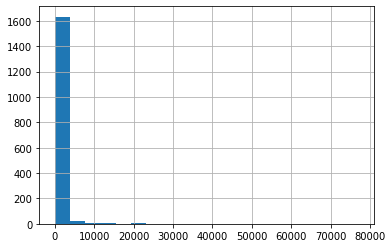

In [78]:
pd.read_sql_query('''
select customerID,sum(UnitPrice*Quantity) as revenue
from transactions
where InvoiceDate>='2010-12-01' and InvoiceDate<'2011-03-01'
and CustomerID is not null
and UnitPrice*Quantity>1
group by 1
order by 1
''',disk_engine)['revenue'].hist(bins=20)

In [74]:
pd.read_sql_query('''
select customerID,log(sum(UnitPrice*Quantity)) as revenue
from transactions
where InvoiceDate>='2010-12-01' and InvoiceDate<'2011-03-01'
and CustomerID is not null
and UnitPrice*Quantity>1
group by 1
order by 1
''',disk_engine)['revenue']

0       4.887525
1       3.074517
2       3.049311
3       2.524266
4       2.472025
          ...   
1676    2.560863
1677    2.575534
1678    2.896399
1679    2.226858
1680    2.481012
Name: revenue, Length: 1681, dtype: float64

<AxesSubplot: >

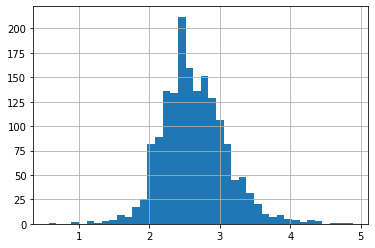

In [103]:
pd.read_sql_query('''
select customerID,log(sum(UnitPrice*Quantity)) as revenue
from transactions
where InvoiceDate>='2010-12-01' and InvoiceDate<'2011-03-01'
and CustomerID is not null
and UnitPrice*Quantity>1
group by 1
order by 1
''',disk_engine)['revenue'].hist(bins=40)

In [81]:
pd.read_sql_query('''
with customer_revenue as (
select customerID,sum(UnitPrice*Quantity) as revenue_3m
from transactions
where InvoiceDate>='2010-12-01' and InvoiceDate<'2011-03-01'
and CustomerID is not null
and UnitPrice*Quantity>1
group by 1
order by 1)
select customerID, 
        case when revenue_3m<10 then '1-10'
             when revenue_3m<100 then '10-100'
             when revenue_3m<1000 then '100-1000'
             when revenue_3m<10000 then '1000-10000'
             when revenue_3m>10000 then '>10000'
             else 'other'
             end as revenue_l3m_segment
from customer_revenue

''',disk_engine)

,customerID,revenue_l3m_segment
0,12346.0,>10000
1,12347.0,1000-10000
2,12348.0,1000-10000
3,12350.0,100-1000
4,12352.0,100-1000
...,...,...
1676,18257.0,100-1000
1677,18259.0,100-1000
1678,18260.0,100-1000
1679,18269.0,100-1000


In [101]:
pd.read_sql_query('''
with customer_revenue as (
select customerID,sum(UnitPrice*Quantity) as revenue_3m
from transactions
where InvoiceDate>='2010-12-01' and InvoiceDate<'2011-03-01'
and CustomerID is not null
and UnitPrice*Quantity>1
group by 1
order by 1),
customer_segment as (
select customerID, 
        case when revenue_3m<10 then '1-10'
             when revenue_3m<100 then '10-100'
             when revenue_3m<1000 then '100-1000'
             when revenue_3m<10000 then '1000-10000'
             when revenue_3m>10000 then '>10000'
             else 'other'
             end as revenue_l3m_segment
from customer_revenue
)
select revenue_l3m_segment,
       count(distinct a.customerID) as n_base,
       count(distinct b.customerID) as n_purchaser,
       sum(Quantity) as qty_purchase, 
       count(distinct InvoiceNo) as n_invoices,
       round(sum(UnitPrice*Quantity)) as rev,
       
       round(sum(UnitPrice*Quantity)/count(distinct b.CustomerID)) as rev_per_customer,
       sum(UnitPrice*Quantity)/sum(Quantity) as revenue_per_item,
       round(sum(UnitPrice*Quantity)/count(distinct InvoiceNo)) as rev_per_invoice,
       
       round(cast(count(distinct InvoiceNo) as float)/count(distinct b.CustomerID),2) as invoice_per_customer
from customer_segment a
left join transactions  b on a.customerID=b.customerID and InvoiceDate>='2011-03-01' and InvoiceDate<'2011-04-01'
group by 1
''',disk_engine)

,revenue_l3m_segment,n_base,n_purchaser,qty_purchase,n_invoices,rev,rev_per_customer,revenue_per_item,rev_per_invoice,invoice_per_customer
0,1-10,3,1,151,1,1268.0,1268.0,8.394040,1268.0,1.00
1,10-100,78,13,1353,19,2098.0,161.0,1.550732,110.0,1.46
2,100-1000,1283,355,68312,516,116601.0,328.0,1.706889,226.0,1.45
3,1000-10000,300,181,86546,431,135342.0,748.0,1.563815,314.0,2.38
4,>10000,17,15,74899,87,127277.0,8485.0,1.699313,1463.0,5.80
